<a href="https://colab.research.google.com/github/nguyendoanquangnhat/CNN/blob/main/CNN_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import load_img,img_to_array
import numpy as np
from os import listdir
from numpy import asarray,save 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle

food_folder='/content/drive/MyDrive/FOOD'
photos,labels=list(),list()

for file in listdir(food_folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('banhmi'):
       output=1
     elif file.startswith('banhxeo'):
       output=2
     elif file.startswith('bunbo'):
       output=3
     elif file.startswith('chetroinuoc'):
       output=4
     elif file.startswith('comtam'):
       output=5
     elif file.startswith('pho'):
       output=6   
     photo=load_img(food_folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('food_photos.npy',photos)
save('food_labels.npy',labels)

(60, 200, 200, 3) (60,)


In [2]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data', 'wb')
pickle.dump((photos,labels), file)
file.close()

def load_data():
    file=open('pix.data', 'rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [3]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (48, 200, 200, 3)
X_test: (12, 200, 200, 3)
y_train: (48, 6)
y_test: (12, 6)


In [4]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses,models,Input
from numpy.ma.core import reshape
   
classes=6

X_train= X_train.astype('float32')/255
X_test= X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [5]:
batch_size=16
epochs=20   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
3/3 [==============================] - 13s 4s/step - loss: 9.3057 - accuracy: 0.1042
Epoch 2/20
3/3 [==============================] - 8s 3s/step - loss: 3.0993 - accuracy: 0.1875
Epoch 3/20
3/3 [==============================] - 9s 2s/step - loss: 1.7155 - accuracy: 0.3958
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 1.5879 - accuracy: 0.2708
Epoch 5/20
3/3 [==============================] - 7s 3s/step - loss: 1.3574 - accuracy: 0.5208
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: 1.1781 - accuracy: 0.6875
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.8249 - accuracy: 0.8333
Epoch 8/20
3/3 [==============================] - 7s 2s/step - loss: 0.5791 - accuracy: 0.8125
Epoch 9/20
3/3 [==============================] - 5s 2s/step - loss: 0.4330 - accuracy: 0.9167
Epoch 10/20
3/3 [==============================] - 6s 2s/step - loss: 0.2027 - accuracy: 0.9583
Epoch 11/20
3/3 [==============================]

In [6]:
model.save("/content/drive/MyDrive/AI/cnn_food.h5")

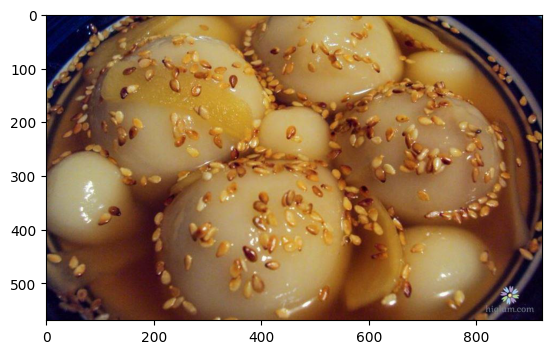

In [13]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model("/content/drive/MyDrive/AI/cnn_food.h5")
img=load_img('/content/drive/MyDrive/FOOD/chetroinuoc9.jpg')
plt.imshow(img)
plt.show()

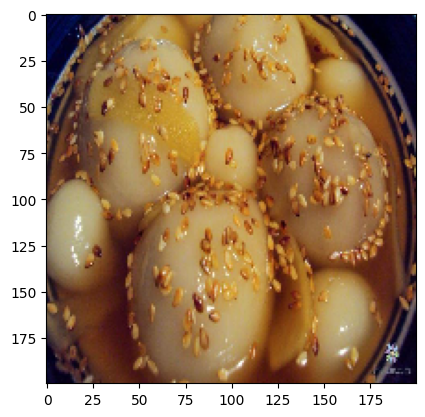

In [14]:
img=load_img('/content/drive/MyDrive/FOOD/chetroinuoc9.jpg',target_size=(200,200))
plt.imshow(img)

In [15]:
class_name = ['BÁNH MÌ','BÁNH XÈO','BÚN BÒ','CHÈ TRÔI NƯỚC','CƠM TẤM','PHỞ']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("ĐÂY LÀ MÓN:", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 120ms/step
ĐÂY LÀ MÓN: CHÈ TRÔI NƯỚC [0.34602702 0.21816877 0.00681619 0.40741864 0.01995299 0.00161633]
0.40741864


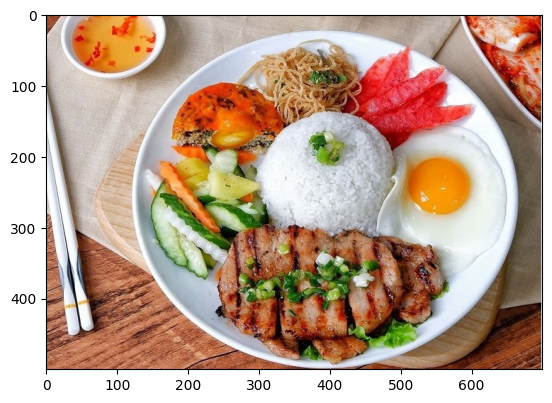

1/1 [==============================] - 0s 77ms/step
ĐÂY LÀ MÓN: CƠM TẤM [3.3314732e-06 2.3227274e-07 1.3109020e-06 3.0071615e-08 9.9999511e-01
 1.8713855e-08]
0.9999951


In [16]:
img1=load_img('/content/drive/MyDrive/FOOD/comtam2.jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/FOOD/comtam2.jpg',target_size=(200,200))
#plt.imshow(img1)

img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("ĐÂY LÀ MÓN:", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))